# Binary Aliens

In this notebook numbers from Pascal triangle in binary are used to generate an image

by Fran Sanchez, The Beach Lab

# Edit parameters here

In [112]:
# Define matrix size 16x16 25x25, etc
aliens=16

In [113]:
# list of colors, apple rainbow
colors = [
    '#000000', #black   0 cell around
    '#4B0082', #indigo  1 cell around
    '#973999', #violet  2 cell around
    '#009cdf', #blue    3 cell around
    '#5ebd3e', #green   4 cell around
    '#ffb900', #yellow  5 cell around
    '#f78200', #orange  6 cell around
    '#e23838', #red     7 cell around
    '#ffffff'  #white   8 cell around
]

# Math

In [114]:
# import libs
import math
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# define the scale of colors
scale = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmap=matplotlib.colors.ListedColormap(colors)
norm=matplotlib.colors.BoundaryNorm(scale, len(colors))

# function to convert a string into separate characters
def Convert(string):
    list1=[]
    list1[:0]=string
    return list1

# function to generate the individual cells os pascal triangle
def combination(n, r): # correct calculation of combinations, n choose k
    return int((math.factorial(n)) / ((math.factorial(r)) * math.factorial(n - r)))

# define the rows of pascal triangle
def pascal_tri(rows):
    result = [] # need something to collect our results in
    for count in range(rows): # start at 0, up to but not including rows number.
        row = [] # need a row element to collect the row in
        for element in range(count + 1): 
            decimal=combination(count, element)
            binary=format(decimal,'0'+str(aliens)+'b') 
            binlist=Convert(binary)
            intlist=[int(i) for i in binlist] # convert list of strings in list of int
            row.append(intlist)
        result.append(row)
    return result

# Auxiliary matrix to compute sum of values around a cell
kernel = np.array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

# define the alien matrix
def alien(i):
    a=np.array(pascal_tri(aliens)[i])
    a.resize(aliens,aliens)
    n=aliens*int((aliens-i)/2)
    b=np.roll(a,n)
    c=np.rot90(b,3)
    return c

# define the alien sums matrix
def alien_sum(i):
    a=signal.convolve(alien(i), kernel, method='direct').astype(int)
    b=a[1:-1, 1:-1] # truncate 4 sides of the matrix
    c=np.multiply(b,alien(i)) # put back the values which were 0
    return c

# define the plot
def alien_plot(i):
    return plt.imshow(alien_sum(i), cmap=cmap, norm=norm)

# Generation process

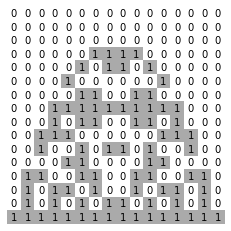

In [115]:
fig, ax = plt.subplots()

ax.set_axis_off()
ax.matshow(alien(aliens-1), cmap="binary", vmin=0, vmax=3)

for i in range(aliens):
    for j in range(aliens):
        c = alien(aliens-1)[j,i]
        ax.text(i, j, str(c), va='center', ha='center')
fig.savefig('matrix1.jpg')

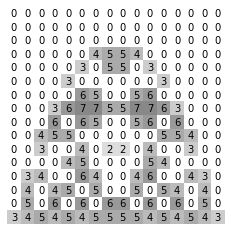

In [116]:
fig, ax = plt.subplots()

ax.set_axis_off()
ax.matshow(alien_sum(aliens-1), cmap="binary", vmin=0, vmax=15)

for i in range(aliens):
    for j in range(aliens):
        c = alien_sum(aliens-1)[j,i]
        ax.text(i, j, str(c), va='center', ha='center')
fig.savefig('matrix2.jpg')

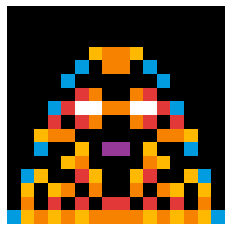

In [117]:
fig, ax = plt.subplots()

ax.set_axis_off()
ax.matshow(alien_sum(aliens-1), cmap=cmap)

fig.savefig('matrix4.jpg')

To create a montage in command line `montage matrix[1-4].jpg  -tile 4x1  -geometry -50-10  matrix-montage.jpg`

# Interactive alien generator

In [118]:
wg.interact(alien_plot, i= wg.IntSlider(max=aliens-1))

interactive(children=(IntSlider(value=0, description='i', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.alien_plot(i)>

# All Pascal Triangle alien rows

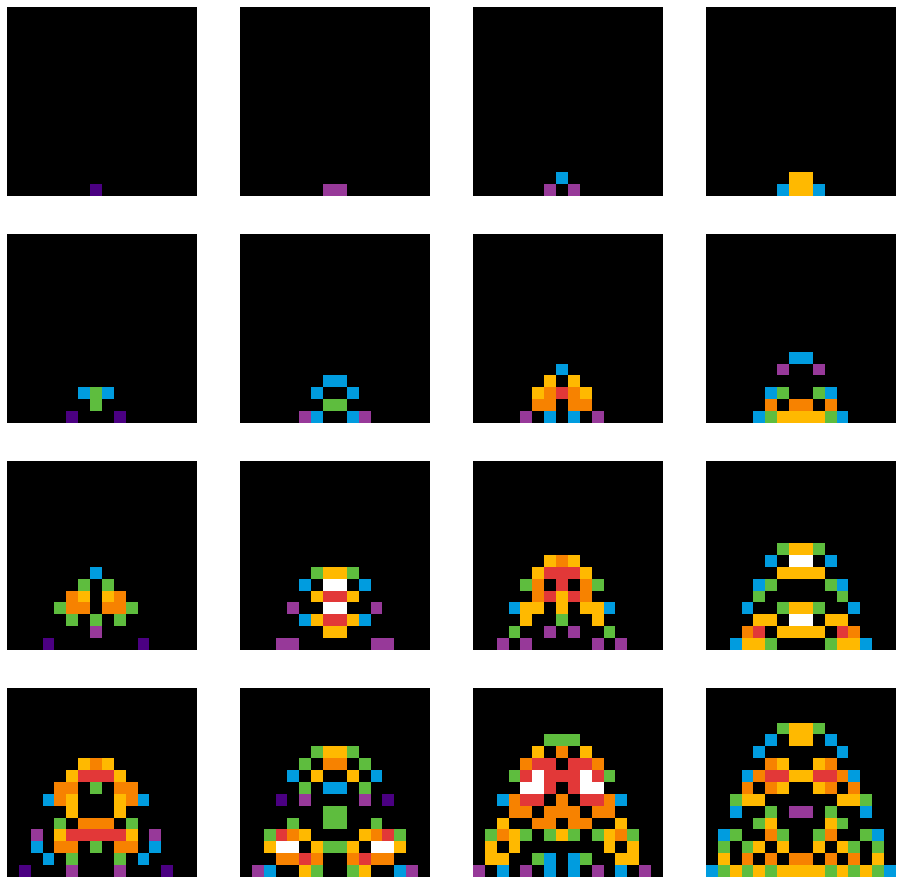

In [119]:
fig, axs = plt.subplots(aliens_root, aliens_root, figsize=(aliens,aliens))
for i,ax in enumerate(axs.flat):
    #ax.title.set_text('Row '+str(i+1))
    ax.set_axis_off()
    #ax.grid(color = 'gray', which='major', linewidth = 0.5)
    im=ax.imshow(alien_sum(i),cmap=cmap, norm=norm)
# colorbar
#cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.96, orientation="horizontal")
#cbar.ax.set_ylabel('', rotation=0)
#cbar.set_ticks(np.arange(0, 1, 2))
#cbar.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# title
#fig.suptitle('Binary Pascal Triangle', fontsize=26)

plt.savefig('aliens.jpg')
plt.show()